# Emotion detection

## Importing Liabraries

In [2]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import tensorflow as tf
import random
import os
%matplotlib inline 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.17.0


### Exporting dataset

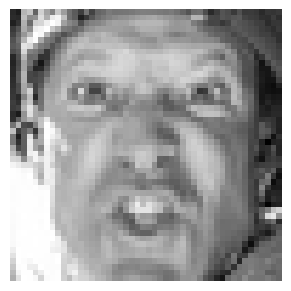

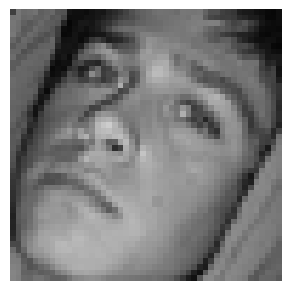

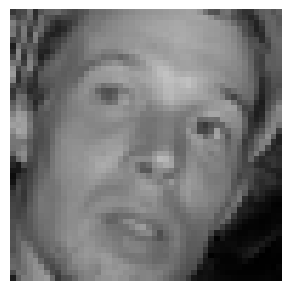

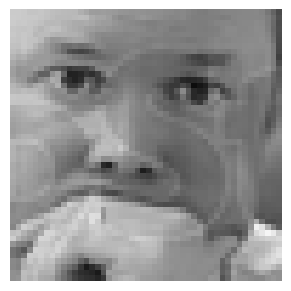

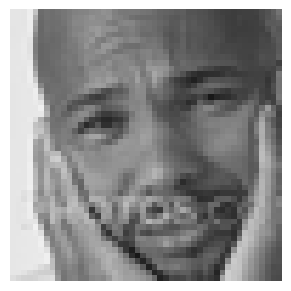

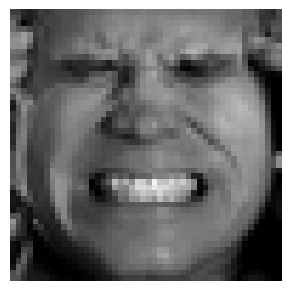

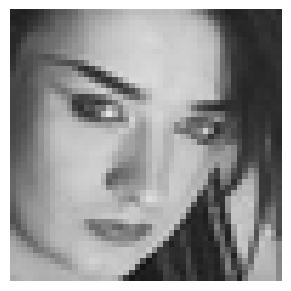

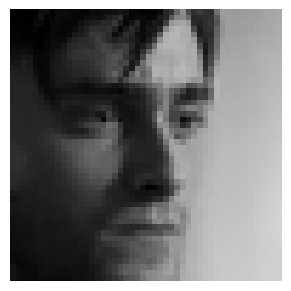

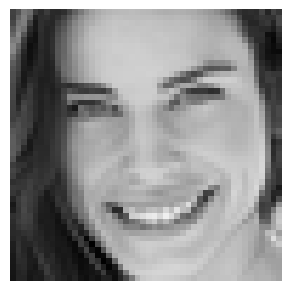

In [4]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

#### Preparing Data for Training

In [17]:
img_size=48
batch_size=64
datagen_train= ImageDataGenerator(horizontal_flip=True)
train_generator= datagen_train.flow_from_directory("train/",
                                                  target_size=(img_size, img_size),
                                                  color_mode="grayscale",
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)

datagen_validation= ImageDataGenerator(horizontal_flip=True)
train_validation= datagen_validation.flow_from_directory("test/",
                                                  target_size=(img_size, img_size),
                                                  color_mode="grayscale",
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#### Defining model

In [18]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [19]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [20]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [21]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

#### Initializing the Model

In [24]:
epochs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=train_validation.n//train_validation.batch_size

checkpoint=ModelCheckpoint("model_weights.weights.h5",monitor= "val_accuracy", save_weights_only=True, mode="max", verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)
callbacks=[checkpoint, reduce_lr]

#### Training the model

In [25]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=train_validation,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15


C:\Users\Dell\anaconda3\envs\emotion_detection\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3120 - loss: 1.8275
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 647s 1s/step - accuracy: 0.3121 - loss: 1.8271 - val_accuracy: 0.4212 - val_loss: 1.4730 - learning_rate: 0.0010
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:17 575ms/step - accuracy: 0.4531 - loss: 1.5534
Epoch 2: saving model to model_weights.weights.h5


C:\Users\Dell\anaconda3\envs\emotion_detection\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4531 - loss: 1.5534 - val_accuracy: 0.2000 - val_loss: 1.8414 - learning_rate: 0.0010
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.4501 - loss: 1.4393
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 272s 604ms/step - accuracy: 0.4501 - loss: 1.4392 - val_accuracy: 0.4985 - val_loss: 1.3009 - learning_rate: 0.0010
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:00 404ms/step - accuracy: 0.4219 - loss: 1.4758
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4219 - loss: 1.4758 - val_accuracy: 0.7000 - val_loss: 1.0339 - learning_rate: 0.0010
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.5106 - loss: 1.2884
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 234s 513ms/step - accuracy: 0.5106 - loss: 1.2884 - val_accuracy: 0.5110 - val_loss: 1.2778 - learning_rate: 0.0010
Epoch 6/15
 

In [26]:
model.evaluate(train_validation)

113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 138ms/step - accuracy: 0.5436 - loss: 1.1797


[1.1592057943344116, 0.5547506213188171]

#### Plotting loss

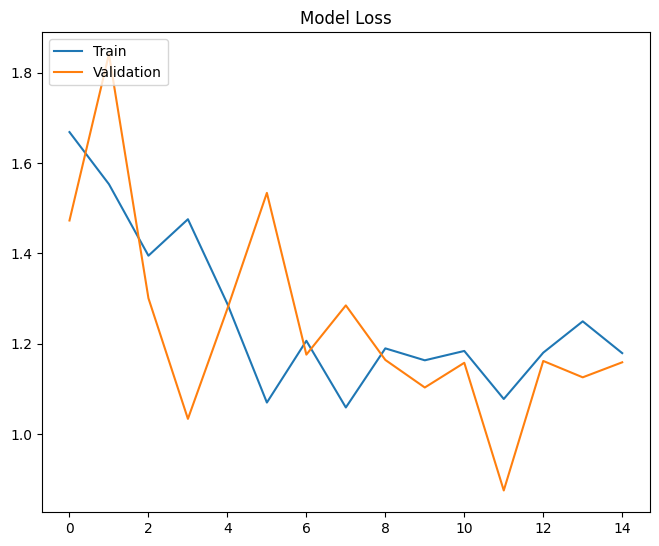

In [27]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.legend(['Train', 'Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

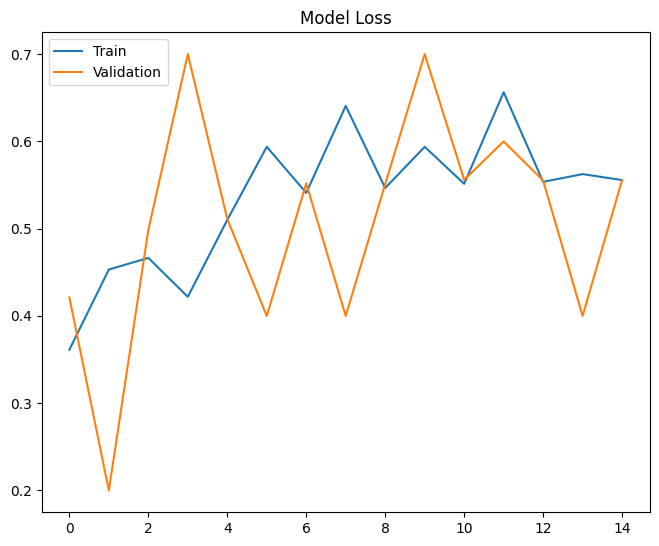

In [28]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Loss")
plt.legend(['Train', 'Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [29]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)